In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as mn
import matplotlib
import matplotlib.pylab as pylab

import math
from math import sqrt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

# Reading both csv files on notebook

In [2]:
Sales_df = pd.read_csv('Salesdata.csv', low_memory = False)

In [3]:
Store_df = pd.read_csv('store.csv', low_memory = False)

## Analysing Salesdata 

In [4]:
Sales_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1
5,6,5,31-07-2015,5651,589,1,1,0,1
6,7,5,31-07-2015,15344,1414,1,1,0,1
7,8,5,31-07-2015,8492,833,1,1,0,1
8,9,5,31-07-2015,8565,687,1,1,0,1
9,10,5,31-07-2015,7185,681,1,1,0,1


In [5]:
Sales_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,01-01-2013,0,0,0,0,a,1
1017200,1107,2,01-01-2013,0,0,0,0,a,1
1017201,1108,2,01-01-2013,0,0,0,0,a,1
1017202,1109,2,01-01-2013,0,0,0,0,a,1
1017203,1110,2,01-01-2013,0,0,0,0,a,1
1017204,1111,2,01-01-2013,0,0,0,0,a,1
1017205,1112,2,01-01-2013,0,0,0,0,a,1
1017206,1113,2,01-01-2013,0,0,0,0,a,1
1017207,1114,2,01-01-2013,0,0,0,0,a,1
1017208,1115,2,01-01-2013,0,0,0,0,a,1


In [6]:
Sales_df.shape

(1017209, 9)

In [7]:
#Getting info about the data types of dataset
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
#Double checking for any null values
Sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
#Getting general statistics of the dataset
Sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
#Checking total number of unique store
Sales_df.Store.nunique()

1115

In [11]:
Sales_df['Date']=pd.to_datetime(Sales_df['Date'],  format= '%d-%m-%Y')

In [12]:
print("First Date:", Sales_df['Date'].min())
print("Last Date:", Sales_df['Date'].max())

First Date: 2013-01-01 00:00:00
Last Date: 2015-07-31 00:00:00


#### We have around 2.5 years of data above

In [13]:
#Extracting day, month and year from Date

Sales_df['Day'] = Sales_df['Date'].apply(lambda x: x.day)
Sales_df['Month'] = Sales_df['Date'].apply(lambda x: x.month)
Sales_df['Year'] = Sales_df['Date'].apply(lambda x: x.year)
Sales_df['Week'] = Sales_df['Date'].apply(lambda x: x.week)

In [14]:
Sales_df.sort_values(by = ["Date","Store"], inplace = True, ascending = [False, True])

In [15]:
Sales_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,Week
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015,31
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015,31
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,7,2015,31
4,5,5,2015-07-31,4822,559,1,1,0,1,31,7,2015,31


# Exploratory data analysis on "Sales" dataset

In [16]:
#Getting statistics
Sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Day,Month,Year,Week
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,1.570279e+01,5.846762e+00,2.013832e+03,2.361551e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,8.787638e+00,3.326097e+00,7.773960e-01,1.443338e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.013000e+03,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,3.000000e+00,2.013000e+03,1.100000e+01
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,6.000000e+00,2.014000e+03,2.200000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.300000e+01,8.000000e+00,2.014000e+03,3.500000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01,1.200000e+01,2.015000e+03,5.200000e+01


### Heatmap on Sales dataset

<Axes: >

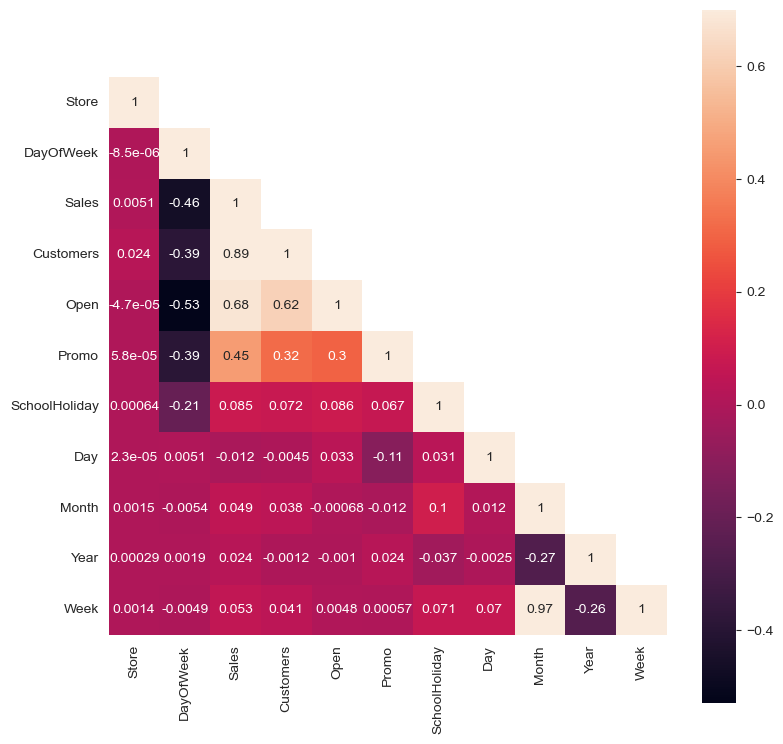

In [17]:
correlation_hm = Sales_df[Sales_df.columns].corr(numeric_only=True)
mask = np.array(correlation_hm)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_hm, mask=mask,vmax=.7, square=True,annot=True)

#### Heatmap Observations
- Sales and Customers: High positive correlation (~0.89). This makes sense as more customers typically lead to higher sales.
- Sales and Promo: Moderate positive correlation (~0.45). Sales tend to increase during promotions.

<Axes: xlabel='DayOfWeek', ylabel='count'>

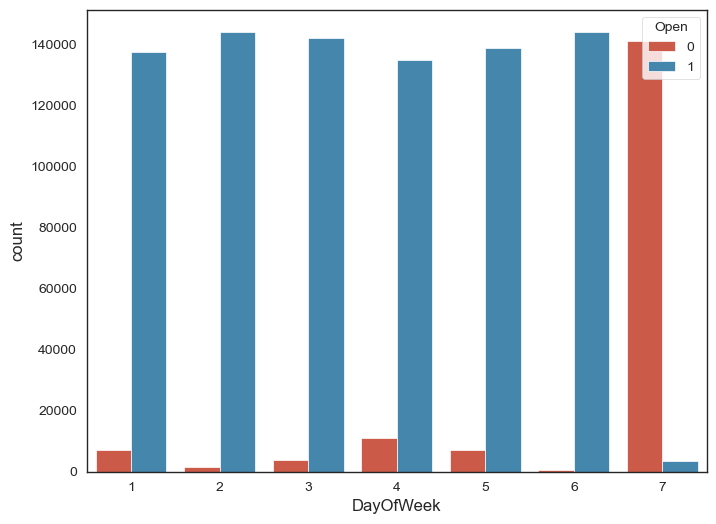

In [18]:
#Plotting bargraph between Stores open and day of the week
sns.countplot(x= 'DayOfWeek', hue= 'Open', data= Sales_df)

#### The graph shown above shows that most of the stores are closed on Sunday(7th day of the week).

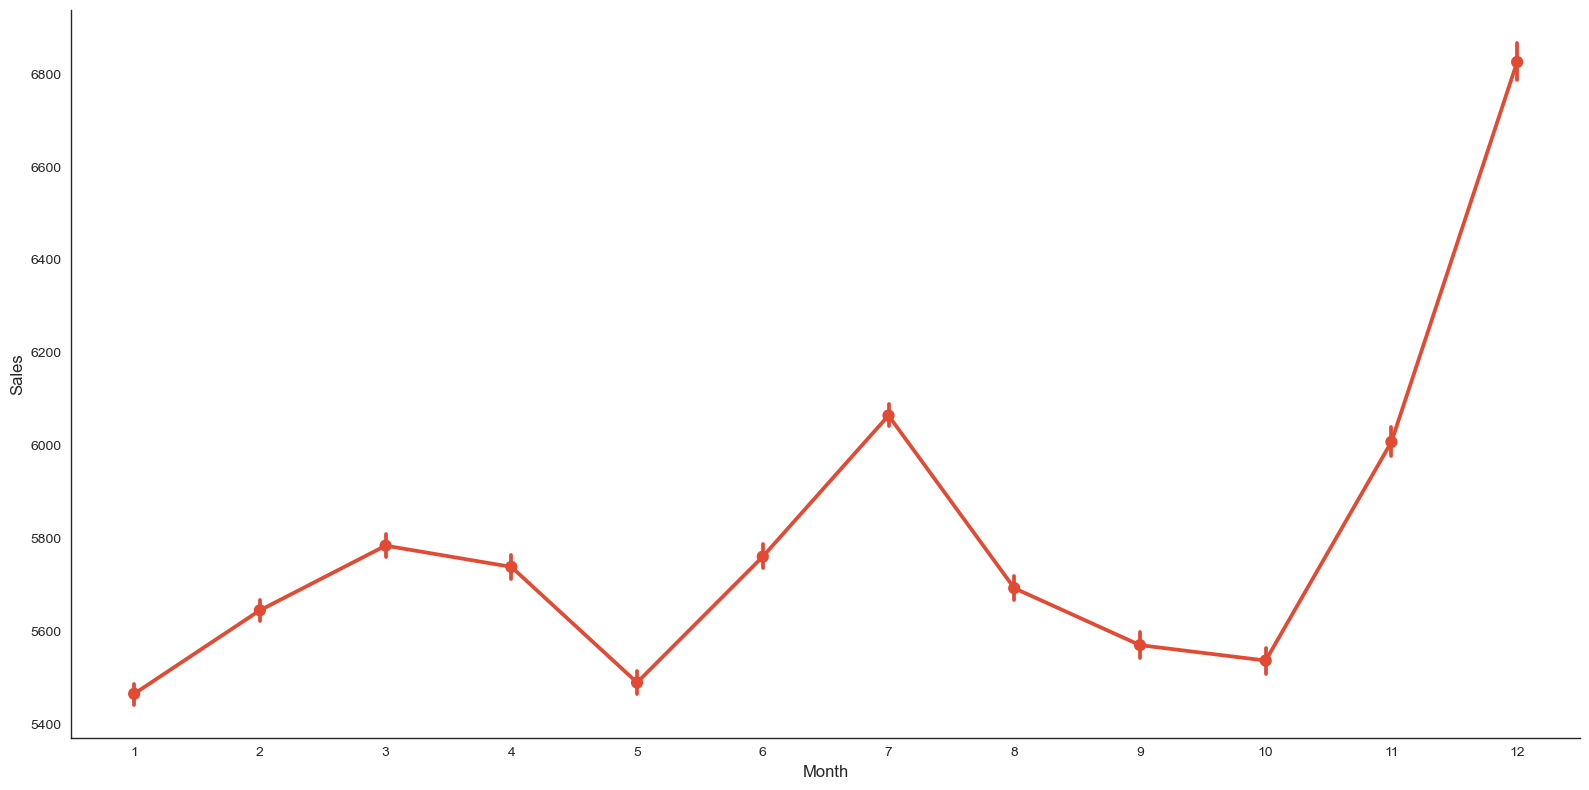

In [20]:
sns.catplot(x= 'Month', y= 'Sales', data= Sales_df, kind= 'point', aspect= 2, height= 8)

#### Above line graph shows that in the month of November and December, sales is increasing significantly.


<Axes: xlabel='Promo', ylabel='Sales'>

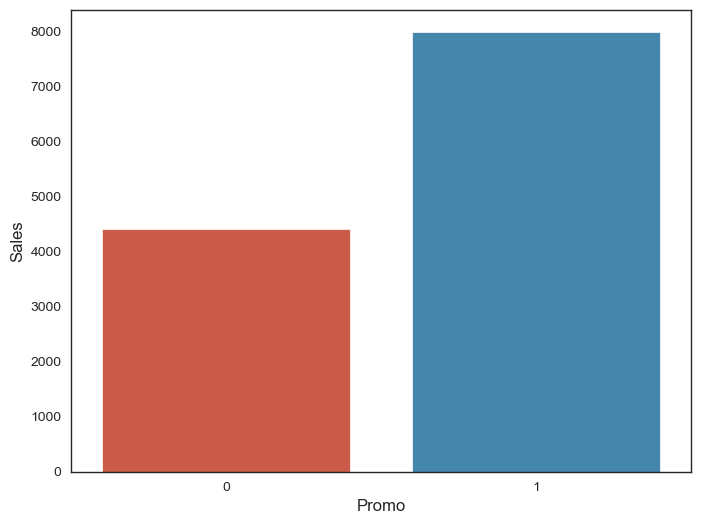

In [21]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(Sales_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

#### Above graph indicates that Sales is doubled when the Stores are running the promotions.

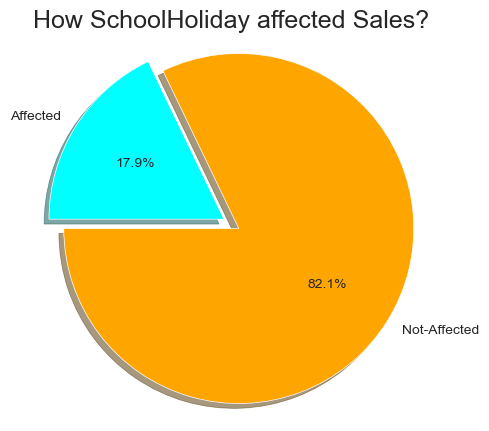

In [22]:
labels = 'Not-Affected' , 'Affected'
sizes = Sales_df.SchoolHoliday.value_counts()
colors = ['orange', 'cyan']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("How SchoolHoliday affected Sales?",fontsize=18)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

#### Converting categorical variable into numerical one for analysis i.e Mapping StateHoliday as 0 and 1

In [23]:
Sales_df["StateHoliday"] = Sales_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [24]:
Sales_df.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

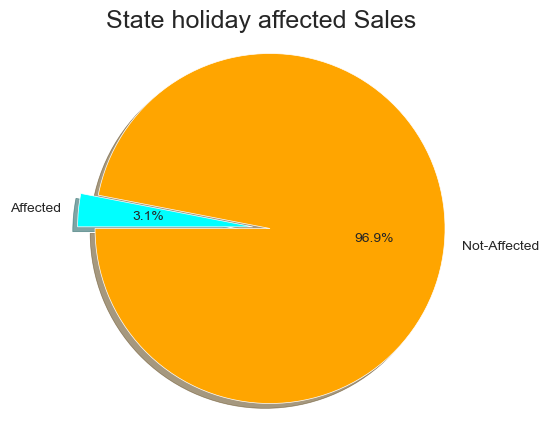

In [25]:
labels = 'Not-Affected' , 'Affected'
sizes = Sales_df.StateHoliday.value_counts()
colors = ['orange','cyan']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("State holiday affected Sales",fontsize=18)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

#### Only 3% of the Sales were affected by StateHoliday which indicates that Sales were not affected by StateHoliday

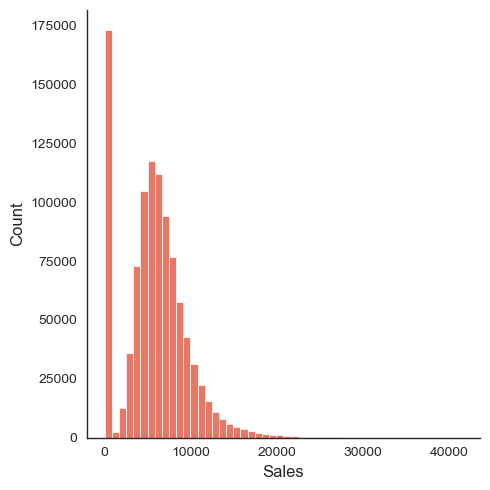

In [26]:
#distribution of sales
fig.set_size_inches(15, 10)
sns.displot(Sales_df['Sales'], kde = False,bins=50);

#### 
- The distribution of sales is highly right-skewed. This indicates that the majority of sales values are clustered towards the lower end of the spectrum, with a long tail extending towards higher sales values.
- Most sales values are below 10,000. The frequency decreases as sales values increase, which is typical for sales data where high sales are less common than low to moderate sales.

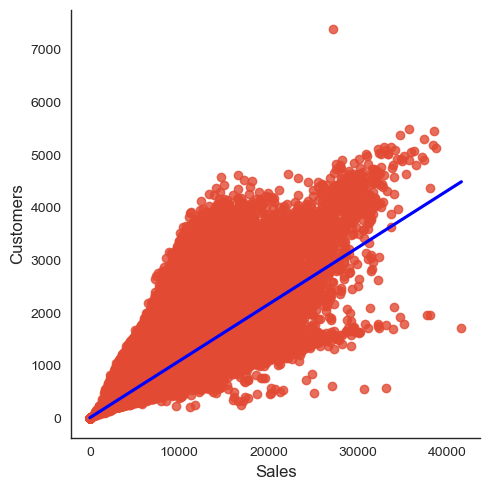

In [27]:
#linear relation between sales and customers
sns.lmplot(x= 'Sales' , y ='Customers',data=Sales_df, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'});

## Store Data Exploration

In [28]:
Store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [29]:
Store_df.tail(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [30]:
Store_df.shape


(1115, 10)

In [31]:
#Getting info about the data types of dataset
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [32]:
#Checking Null Values
Store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

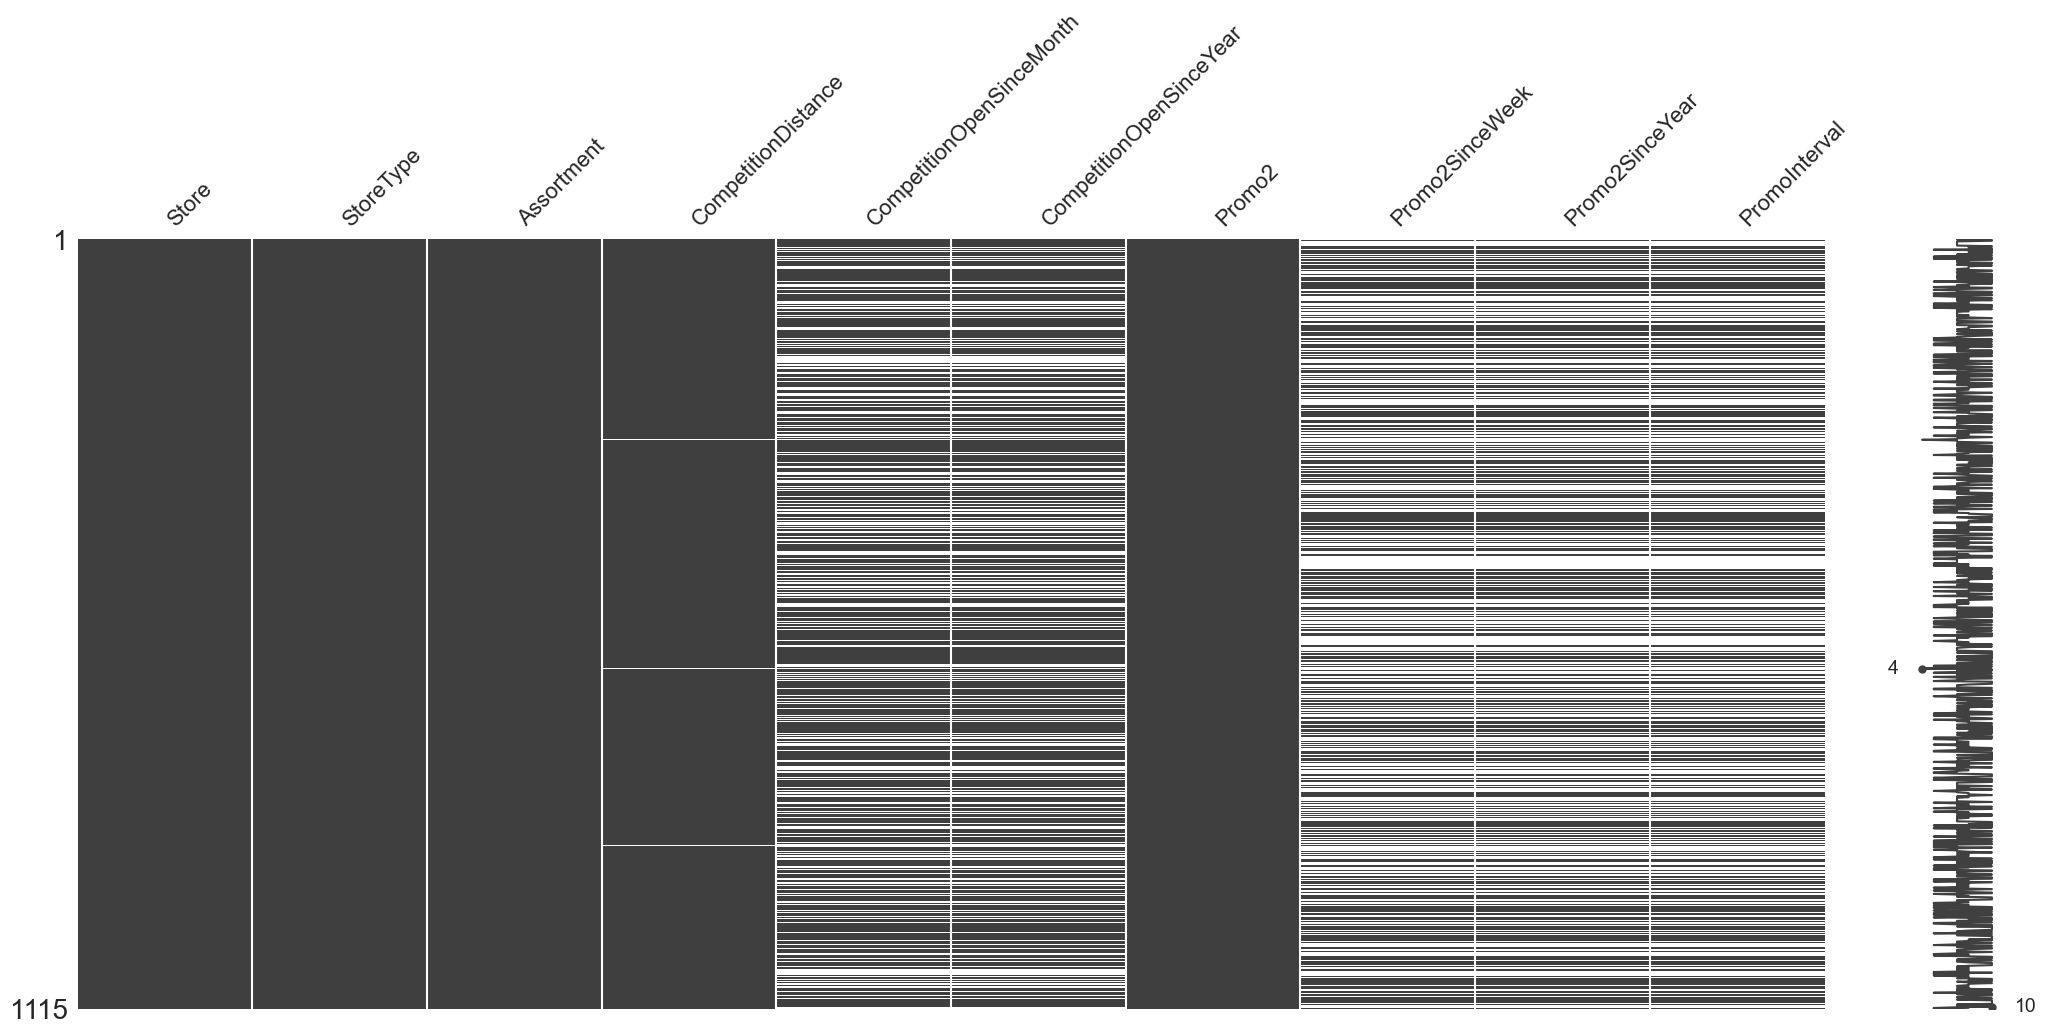

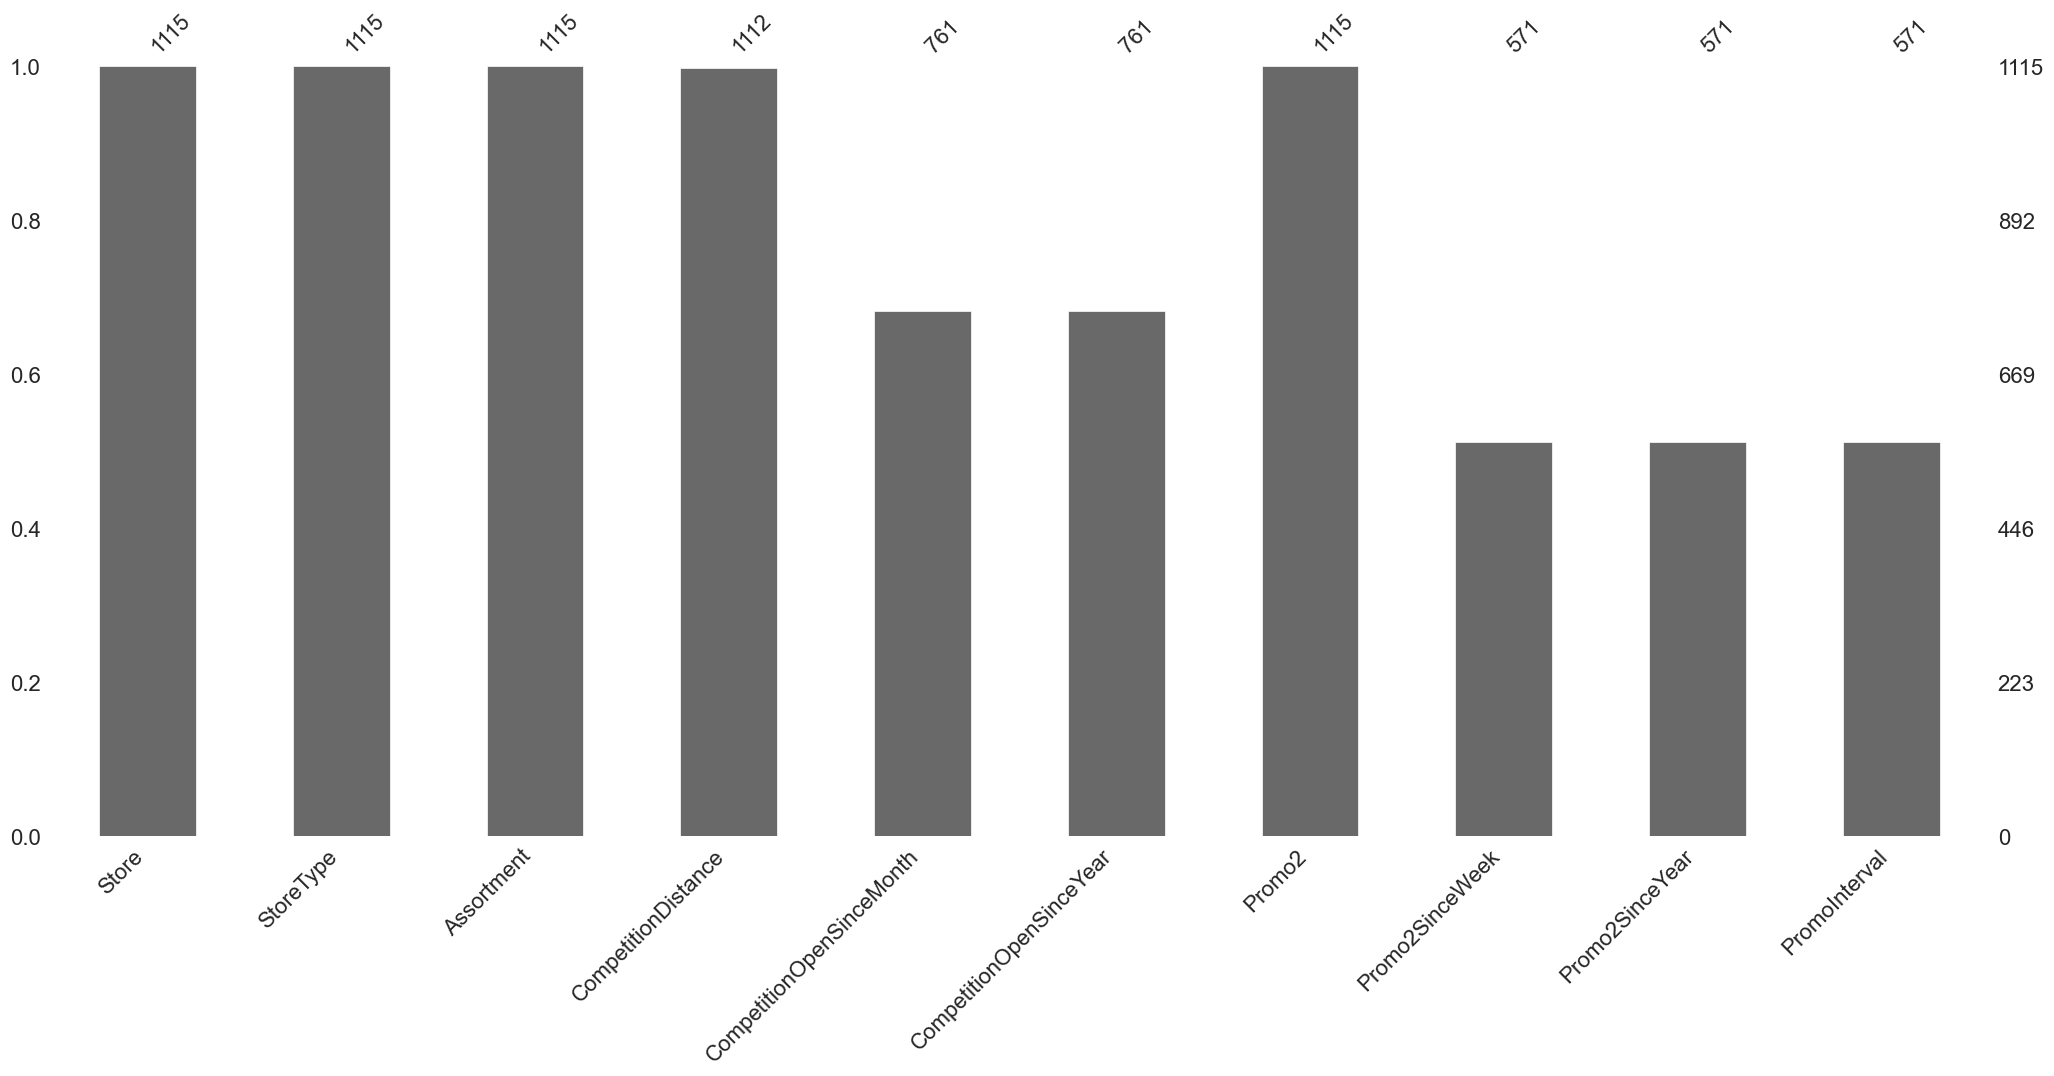

In [33]:
mn.matrix(Store_df)
plt.show()

# Bar plot of missing values
mn.bar(Store_df)
plt.show()

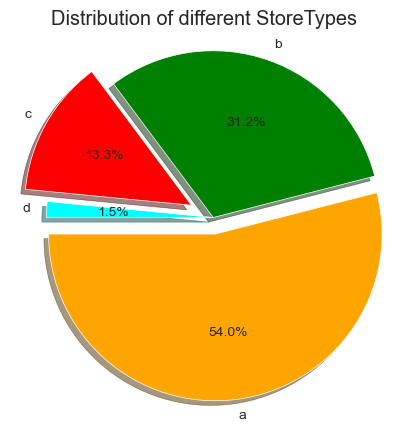

In [34]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = Store_df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'cyan']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

In [35]:
# remove features
Store_df = Store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

In [36]:
Store_df.isnull().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    3
Promo2                 0
dtype: int64

In [37]:
Store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,1270.0,0
1,2,a,a,570.0,1
2,3,a,a,14130.0,1
3,4,c,c,620.0,0
4,5,a,a,29910.0,0


In [38]:
# replace missing values in CompetitionDistance with median for the store dataset

Store_df.CompetitionDistance.fillna(Store_df.CompetitionDistance.median(), inplace=True)

C:\Users\Saket Jha\AppData\Local\Temp\ipykernel_2112\713415846.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=Store_df['CompetitionDistance'])


Text(0.5, 0, 'Competition Distance Distribution Plot')

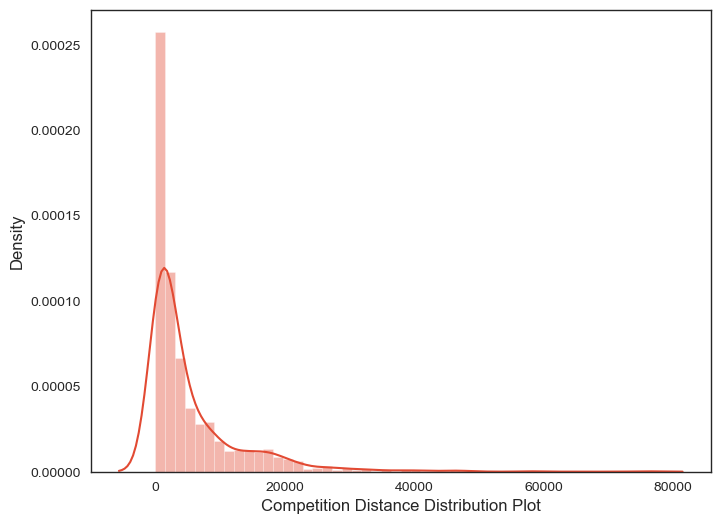

In [39]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(x=Store_df['CompetitionDistance'])
plt.xlabel('Competition Distance Distribution Plot')

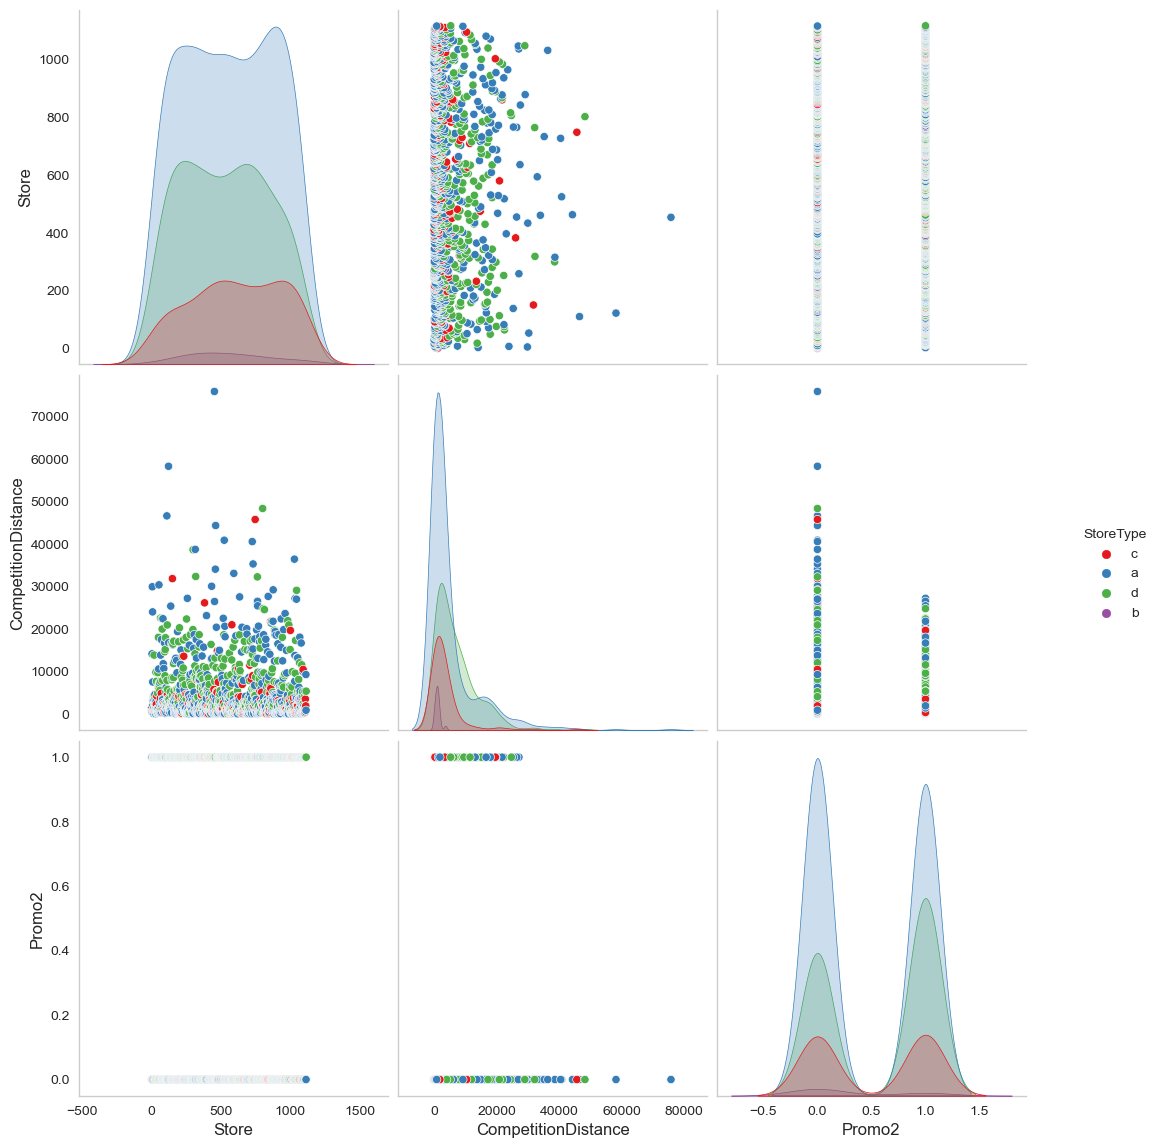

In [40]:
sns.set_style("whitegrid", {'axes.grid': False})
pp = sns.pairplot(Store_df, hue='StoreType', palette='Set1')
pp.fig.set_size_inches(12, 12)
plt.show()

## Merging both the datasets

In [41]:
m_df = pd.merge(Sales_df, Store_df, on='Store', how= 'left')

In [42]:
m_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,Week,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,7,2015,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,31,7,2015,31,a,a,29910.0,0
5,6,5,2015-07-31,5651,589,1,1,0,1,31,7,2015,31,a,a,310.0,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,31,7,2015,31,a,c,24000.0,0
7,8,5,2015-07-31,8492,833,1,1,0,1,31,7,2015,31,a,a,7520.0,0
8,9,5,2015-07-31,8565,687,1,1,0,1,31,7,2015,31,a,c,2030.0,0
9,10,5,2015-07-31,7185,681,1,1,0,1,31,7,2015,31,a,a,3160.0,0


In [43]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  int64         
 8   SchoolHoliday        1017209 non-null  int64         
 9   Day                  1017209 non-null  int64         
 10  Month                1017209 non-null  int64         
 11  Year                 1017209 non-null  int64         
 12  Week                 1017209 non-null  int64         
 1

### EDA on Merged Data

#### Heatmap of Merged data

In [44]:
corr_df = m_df.drop(columns = ['Store', 'Year', 'Week', 'Day','StoreType','Assortment'], axis =1)
corr_df['StateHoliday'] = corr_df['StateHoliday'].replace({'a': 1, 'b': 1, 'c': 1})

C:\Users\Saket Jha\AppData\Local\Temp\ipykernel_2112\2727302991.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_df.corr()


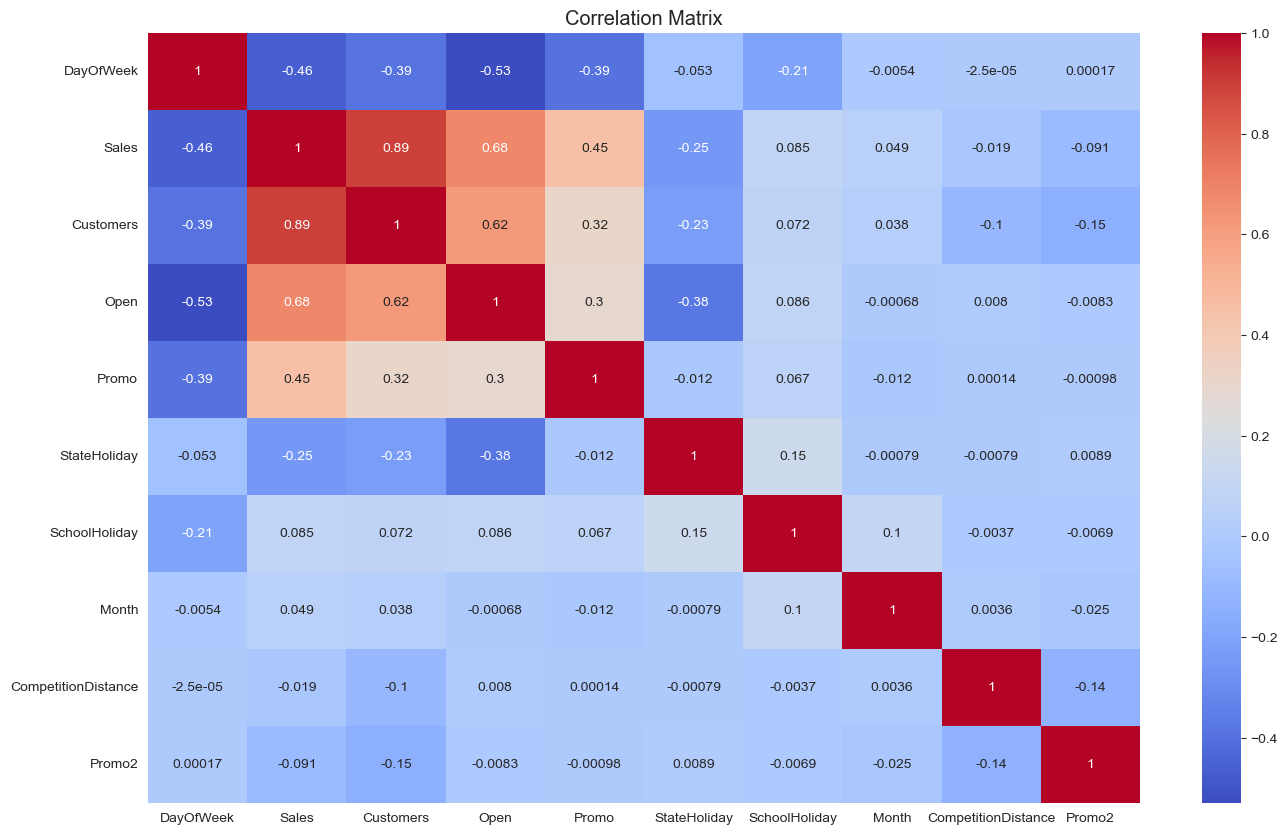

In [45]:
non_numeric_columns = corr_df.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    corr_df[col] = pd.to_numeric(corr_df[col], errors='coerce')

# Calculate the correlation matrix
corr_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title('Correlation Matrix')
plt.show()

In [46]:
m_df["Avg_Customer_Sales"] = m_df.Sales/m_df.Customers

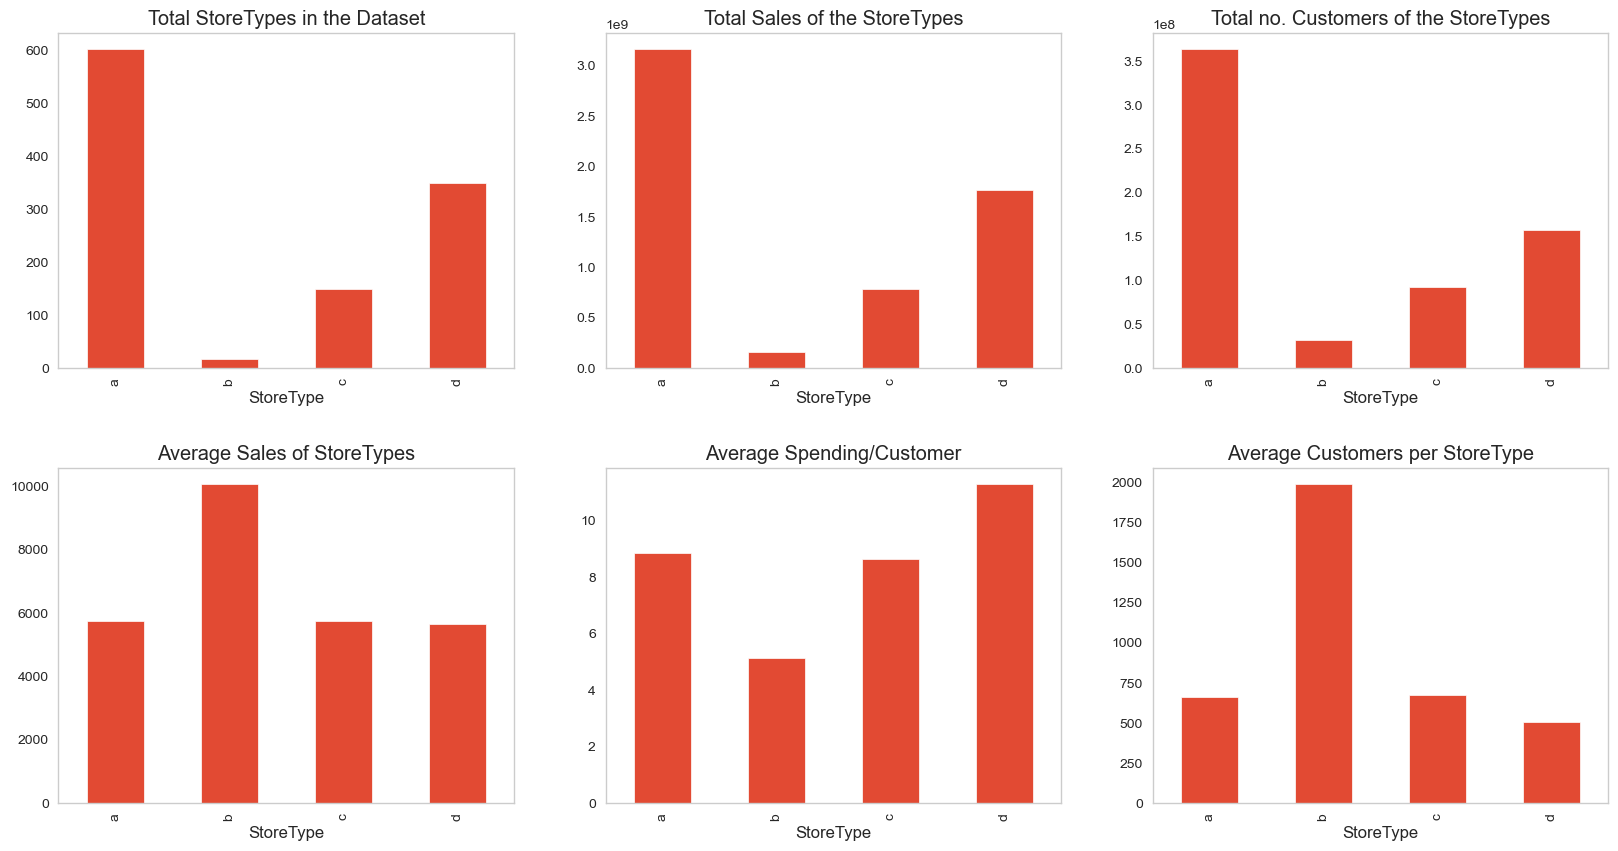

In [48]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

Store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
m_df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
m_df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total no. Customers of the StoreTypes")
m_df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
m_df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending/Customer")
m_df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

#### As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.

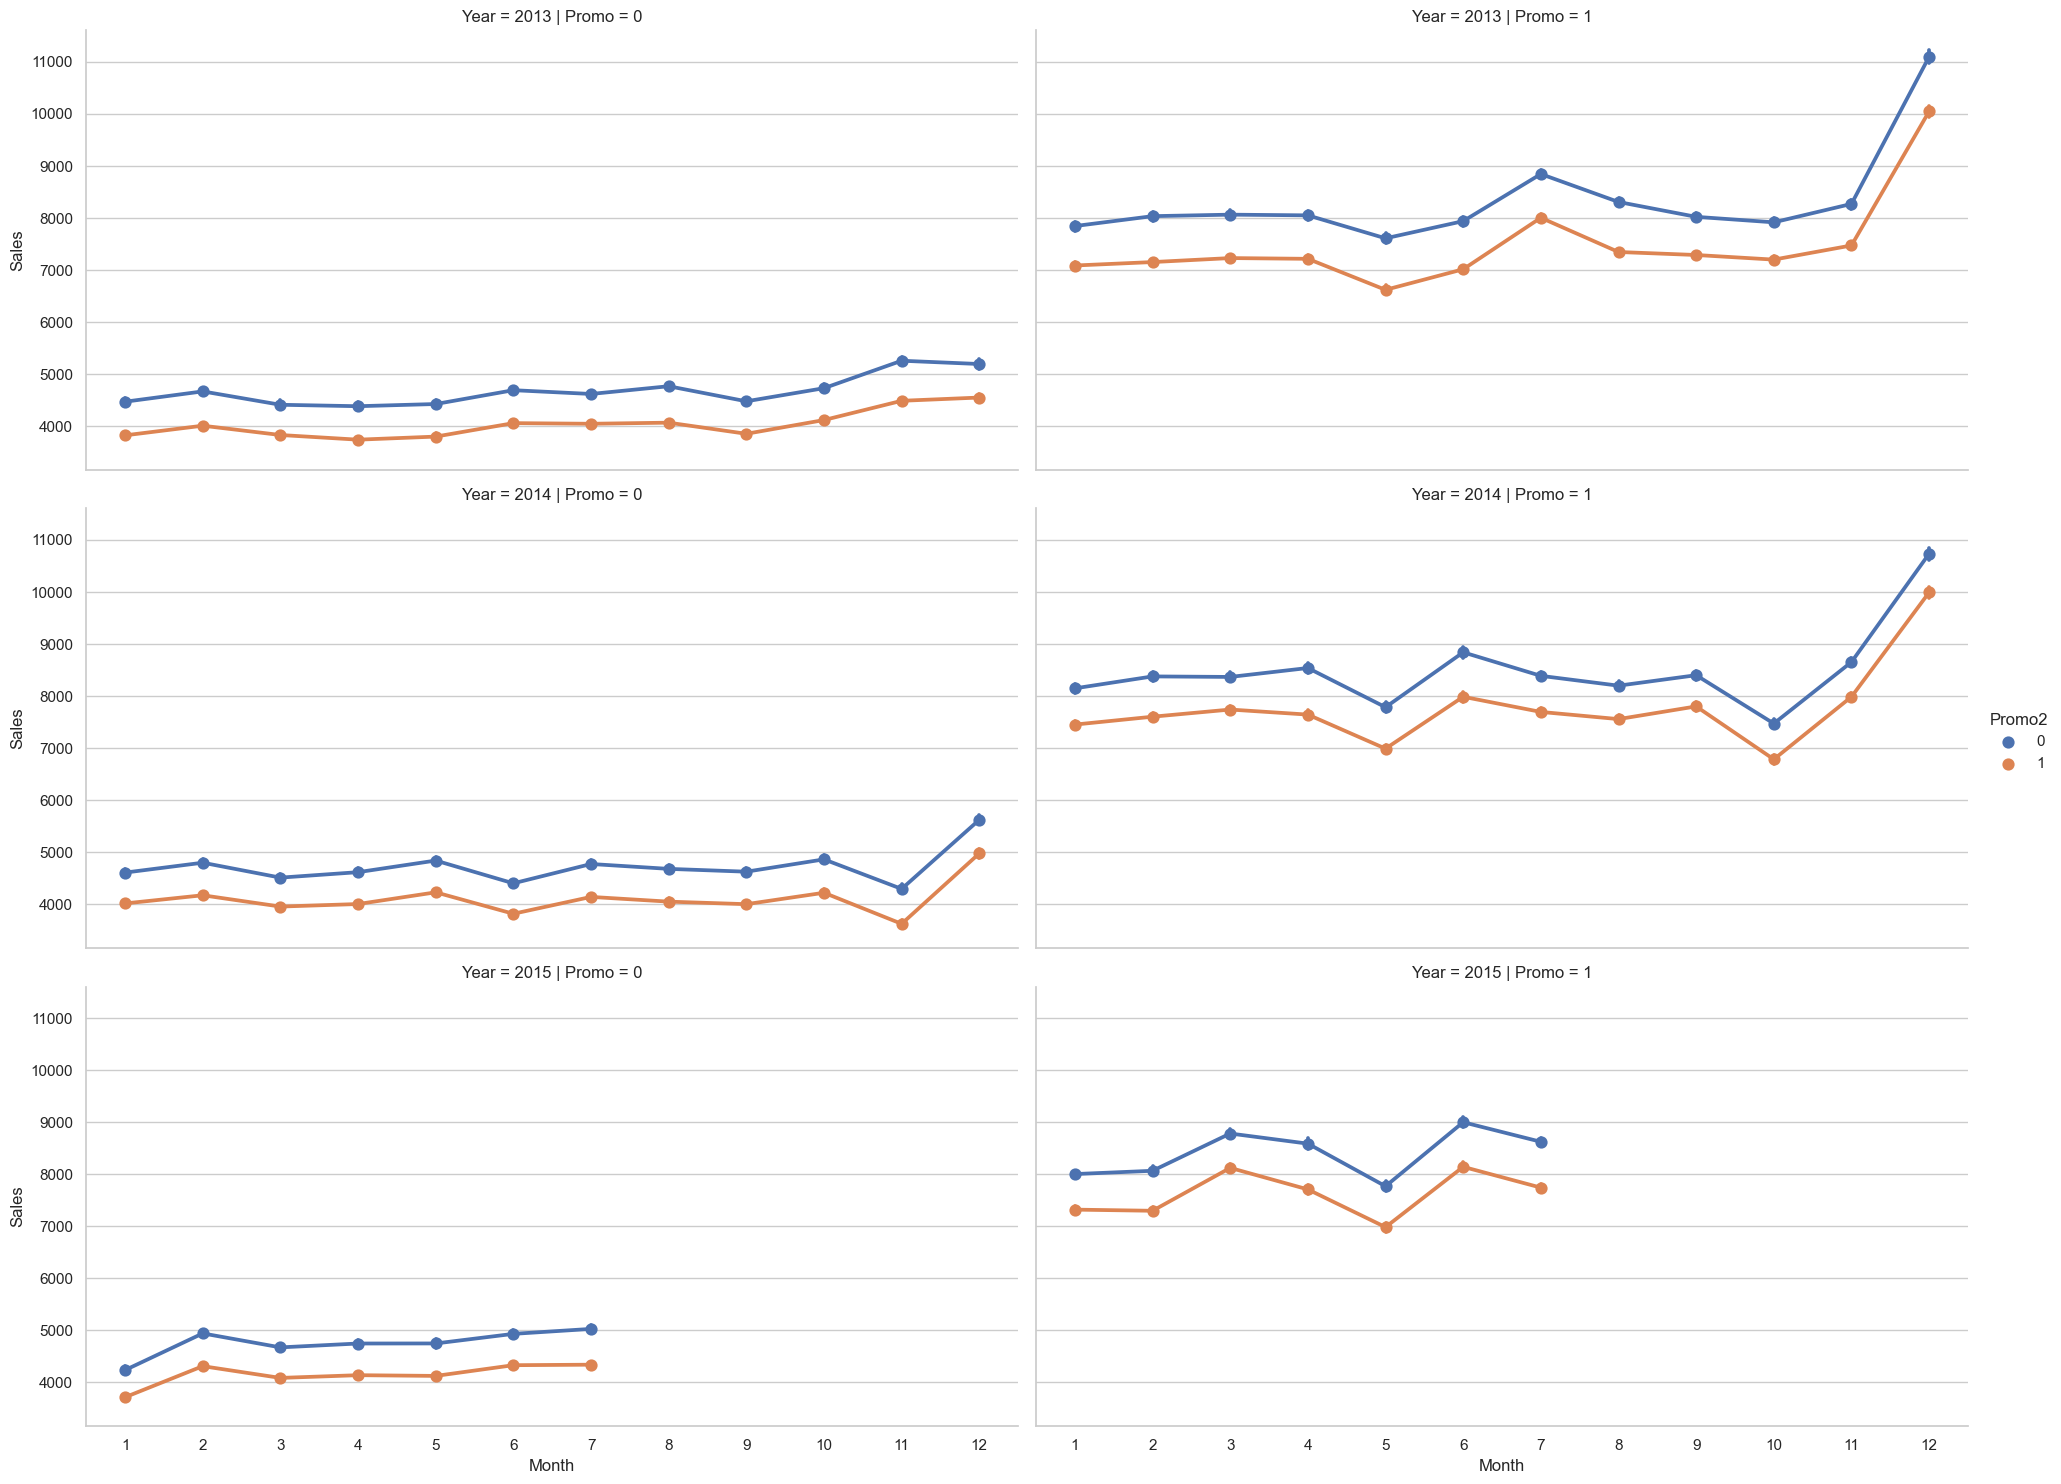

In [51]:
sns.set(style="whitegrid")

# Create the catplot
sns.catplot(data=m_df, x="Month", y="Sales", 
            col='Promo',      
            hue='Promo2',     
            row='Year',       
            kind='point',     
            aspect=2,         
            height=5)         

plt.show()

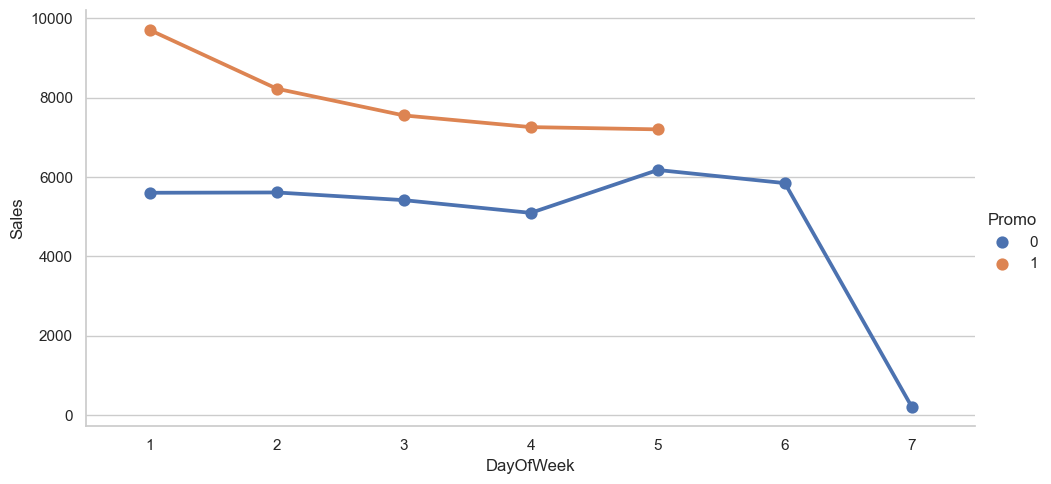

In [55]:
sns.set(style="whitegrid")

# Create the catplot with kind='line'
sns.catplot(data=m_df, x="DayOfWeek", y="Sales", 
            hue="Promo",          
            kind='point',          
            aspect=2,             
            height=5)             

plt.show()

#### Boxplots for outliners


<Axes: >

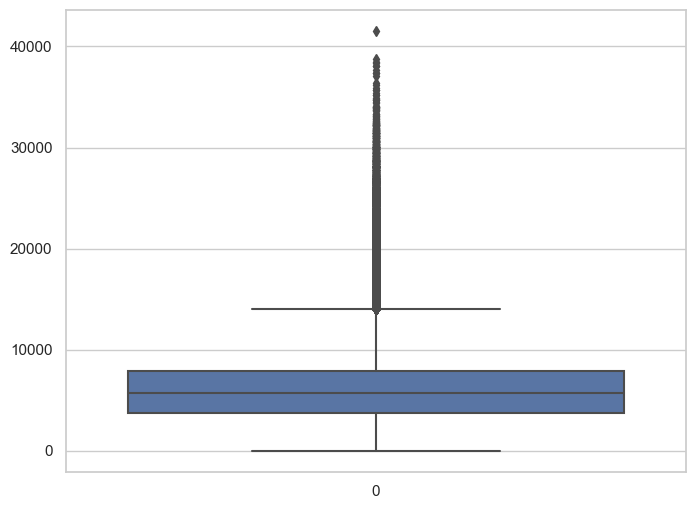

In [56]:
#checking outliers in sales
sns.boxplot(m_df['Sales'])

#### Box plot shows that we have a very high outliers in sales

In [58]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [59]:
m_df= remove_outlier(m_df, 'Sales')

#### Drop Subsets Of Data Where Might Cause Bias

In [60]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
m_df = m_df[m_df.Open != 0]

In [61]:
# Open isn't a variable anymore, so we'll drop it too
m_df = m_df.drop('Open', axis=1)

In [62]:
# Check if there's any opened store with zero sales
m_df[m_df.Sales == 0]['Store'].sum()

31460

In [63]:
# see the percentage of open stored with zero sales
m_df[m_df.Sales == 0]['Sales'].sum()/m_df.Sales.sum()

0.0

In [64]:
# remove this part of data to avoid bias
m_df = m_df[m_df.Sales != 0]

In [65]:
new_df=m_df.copy()

In [66]:
new_df = pd.get_dummies(new_df,columns=['StoreType','Assortment'])

In [67]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Day,Month,...,CompetitionDistance,Promo2,Avg_Customer_Sales,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,0,1,31,7,...,1270.0,0,9.482883,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,0,1,31,7,...,570.0,1,9.702400,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,0,1,31,7,...,14130.0,1,10.126675,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,0,1,31,7,...,620.0,0,9.342457,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,0,1,31,7,...,29910.0,0,8.626118,1,0,0,0,1,0,0


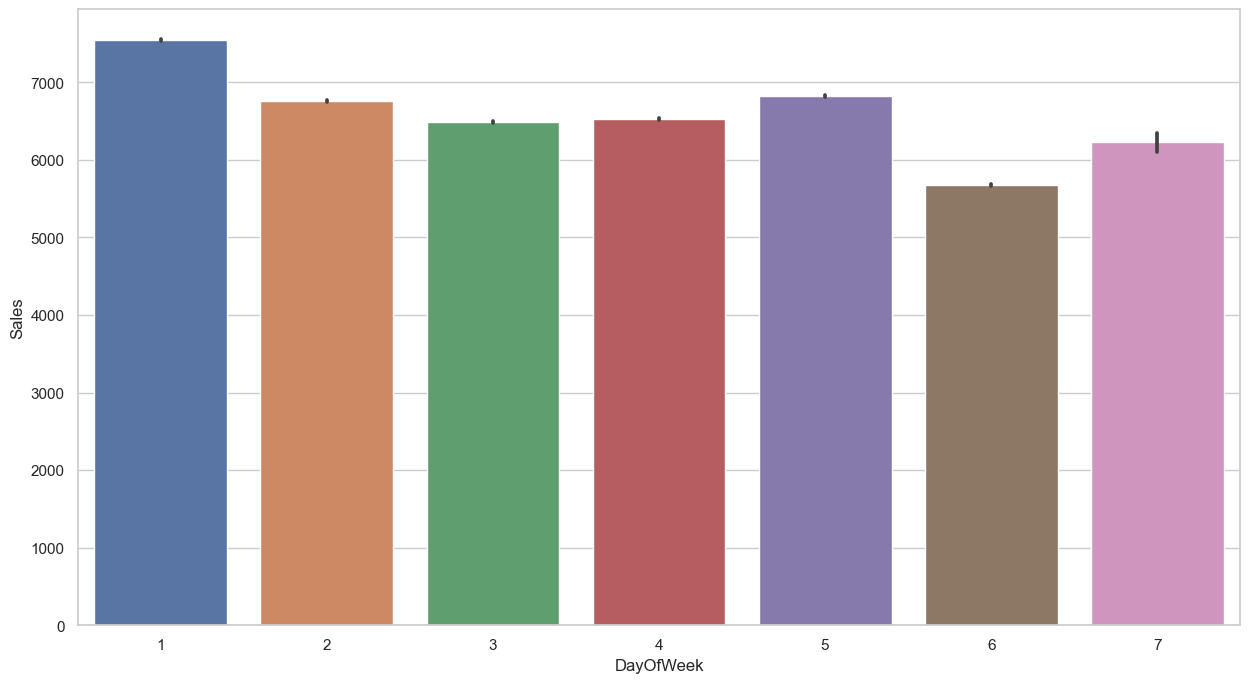

In [68]:
#plot for sales in terms of days of the week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=new_df); 

In [69]:
x= new_df.drop(['Sales','Store','Date','Year'] , axis = 1)
y= new_df.Sales

In [73]:
x.shape

(817644, 18)

In [71]:
x.head()

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,Day,Month,Week,CompetitionDistance,Promo2,Avg_Customer_Sales,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,0,1,31,7,31,1270.0,0,9.482883,0,0,1,0,1,0,0
1,5,625,1,0,1,31,7,31,570.0,1,9.702400,1,0,0,0,1,0,0
2,5,821,1,0,1,31,7,31,14130.0,1,10.126675,1,0,0,0,1,0,0
3,5,1498,1,0,1,31,7,31,620.0,0,9.342457,0,0,1,0,0,0,1
4,5,559,1,0,1,31,7,31,29910.0,0,8.626118,1,0,0,0,1,0,0


In [74]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

#### Splitting Dataset Into Training Set and Test Set

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [76]:
columns=x_train.columns

## 1. Linear Regression (OLS)

In [78]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [79]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [80]:
regressor.intercept_

-2638560860125715.0

In [81]:
regressor.coef_

array([-7.50375379e+01,  3.44771322e+04,  2.17098540e+02,  4.53575407e+02,
        1.01328912e+01,  1.15949737e+01,  1.33642313e+02, -7.10147814e+01,
        2.01664276e+02, -1.18374232e+02,  3.14121065e+04,  1.93019396e+14,
        1.93019396e+14,  1.93019396e+14,  1.93019396e+14,  2.44554146e+15,
        2.44554146e+15,  2.44554146e+15])

In [82]:
y_pred_train = regressor.predict(x_train)

In [84]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [85]:
mean_squared_error(y_test, y_pred)

372556.18093186134

In [86]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

610.3738042641257

In [87]:
train_score_1=regressor.score(x_train,y_train)
train_score_1

0.9385012413577899

In [88]:
test_score_1=regressor.score(x_test,y_test)
test_score_1

0.9390169701170399

In [89]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [90]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

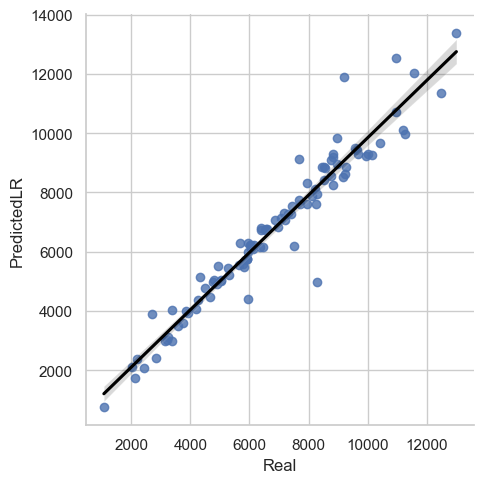

In [91]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

In [93]:
x = sm.add_constant(x) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
predictions = model.predict(x)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 7.820e+05
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:07:34   Log-Likelihood:            -6.4059e+06
No. Observations:              817644   AIC:                         1.281e+07
Df Residuals:                  817627   BIC:                         1.281e+07
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4354.2384      3.796  -1147.051      0.000   -4361.678   -4346.798
DayOfWeek             -12.1621      0.416    -29.249      0.000     -12.977     -11.347
Customers               8.1188      0.003   3038.706      0.000       8.114       8.124
Promo                 214.9674      1.586    135.508      0.000     211.858     218.077
StateHoliday          454.6151     22.177     20.499      0.000     411.149     498.082
SchoolHoliday          10.0656      1.762      5.714      0.000       6.613      13.518
Day                     0.3597      0.080      4.475      0.000       0.202       0.517
Month                  11.8961      0.759     15.679      0.000      10.409      13.383
Week                   -1.3725      0.175     -7.857      0.000      -1.715      -1.030
CompetitionDistance     0.0026   9.16e-05     28.550      0.000       0.002       0.003
Promo2               -119.6550      1.440    -83.094      0.000    -122.477    -116.833
Avg_Customer_Sales    642.0571      0.443   1448.487      0.000     641.188     642.926
StoreType_a          -643.0481      2.581   -249.147      0.000    -648.107    -637.989
StoreType_b         -2234.1398      6.757   -330.620      0.000   -2247.384   -2220.896
StoreType_c          -668.1826      2.845   -234.860      0.000    -673.759    -662.606
StoreType_d          -808.8679      2.991   -270.411      0.000    -814.731    -803.005
Assortment_a         -312.5969      3.558    -87.854      0.000    -319.571    -305.623
Assortment_b        -3792.8700      8.149   -465.421      0.000   -3808.842   -3776.898
Assortment_c         -248.7715      3.698    -67.277      0.000    -256.019    -241.524
==============================================================================
Omnibus:                   432213.701   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29118987.688
Skew:                          -1.735   Prob(JB):                         0.00
Kurtosis:                      32.029   Cond. No.                     1.47e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.47e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""